In [12]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!pip install tensorflow
!pip install opencv-python
!pip install opencv-contrib-python
import tensorflow as tf
import numpy as np
from tensorflow import keras
import os
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
train=ImageDataGenerator(rescale=1./255,
                                 shear_range=0.2,
                                 rotation_range=180,
                                 zoom_range=0.2,
                                 horizontal_flip=True)
train = ImageDataGenerator(rescale=1/255)
test = ImageDataGenerator(rescale=1/255)

In [4]:
train_dataset = train.flow_from_directory("/content/drive/MyDrive/IBM/final deliverables/Dataset/Dataset/train_set",
                                          target_size=(128,128),
                                          batch_size = 32,
                                          class_mode = 'binary' )

Found 1520 images belonging to 2 classes.


In [5]:
test_dataset = test.flow_from_directory("/content/drive/MyDrive/IBM/final deliverables/Dataset/Dataset/Testing",
                                          target_size=(128,128),
                                          batch_size = 32,
                                          class_mode = 'binary' )

Found 380 images belonging to 2 classes.


In [6]:
test_dataset.class_indices

{'fire': 0, 'nofire': 1}

In [7]:
#to define linear initialisation import sequential
from keras.models import Sequential
#to add layer import Dense
from keras.layers import Dense
#to create convolution kernel import convolution2D
from keras.layers import Convolution2D
#import Maxpooling layer
from keras.layers import MaxPooling2D
#import flatten layer
from keras.layers import Flatten
import warnings
warnings.filterwarnings('ignore')

In [8]:
model = keras.Sequential()
model.add(Convolution2D(32,(3,3),input_shape=(128,128,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Convolution2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Convolution2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Convolution2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())

In [9]:
model.add(Dense(150,activation='relu'))

model.add(Dense(1,activation='sigmoid'))

In [10]:
model.compile(loss = 'binary_crossentropy',
              optimizer = "adam",
              metrics = ["accuracy"])

In [11]:
r = model.fit(train_dataset, epochs = 5, validation_data = test_dataset)

Epoch 1/5
48/48 [==============================] - 225s 5s/step - loss: 0.3302 - accuracy: 0.8566 - val_loss: 0.2692 - val_accuracy: 0.9053
Epoch 2/5
48/48 [==============================] - 39s 821ms/step - loss: 0.1600 - accuracy: 0.9454 - val_loss: 0.2026 - val_accuracy: 0.9211
Epoch 3/5
48/48 [==============================] - 39s 820ms/step - loss: 0.1423 - accuracy: 0.9533 - val_loss: 0.1956 - val_accuracy: 0.9289
Epoch 4/5
48/48 [==============================] - 37s 778ms/step - loss: 0.1232 - accuracy: 0.9572 - val_loss: 0.1302 - val_accuracy: 0.9553
Epoch 5/5
48/48 [==============================] - 39s 814ms/step - loss: 0.0876 - accuracy: 0.9697 - val_loss: 0.1191 - val_accuracy: 0.9553


In [13]:
predictions = model.predict(test_dataset)
predictions = np.round(predictions)

12/12 [==============================] - 4s 266ms/step


In [14]:
predictions

array([[1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],

In [15]:
print(len(predictions))

380


In [16]:
model.save("/content/forest1.h5")

In [17]:
#import load_model from keras.model
from keras.models import load_model
#import image class from keras
import tensorflow as tf
from tensorflow.keras.preprocessing import image
#import numpy
import numpy as np
#import cv2
import cv2

In [18]:
model = load_model("/content/forest1.h5")

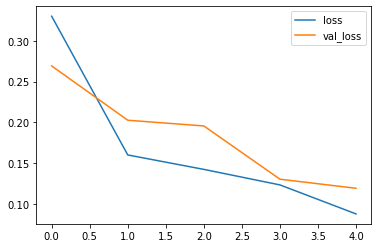

In [19]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()

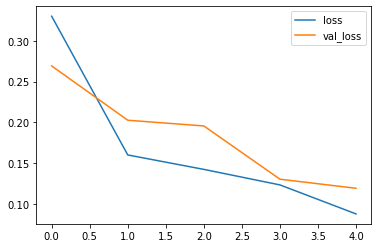

In [20]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()

In [21]:
def predictImage(filename):
  img1=image.load_img(filename,target_size=(128,128))
  plt.imshow(img1)
  y=image.img_to_array(img1)
  x=np.expand_dims(y,axis=0)
  val=model.predict(x)
  print(val)
  if val==0:
    plt.xlabel("fire",fontsize=30)
  elif val==1:
    plt.xlabel("no fire",fontsize=30)

1/1 [==============================] - 0s 96ms/step
[[0.]]


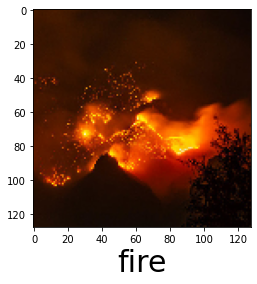

In [22]:
predictImage("/content/drive/MyDrive/IBM/final deliverables/Dataset/Dataset/Testing/fire/fire_0224.jpg")

1/1 [==============================] - 0s 24ms/step
[[1.]]


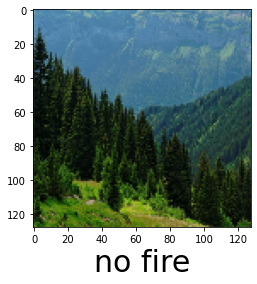

In [23]:
predictImage("/content/drive/MyDrive/IBM/final deliverables/Dataset/Dataset/Testing/nofire/nofire_0115.jpg")

In [24]:
pip install twilio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.4 MB 5.3 MB/s 


In [25]:
pip install playsound

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for playsound: filename=playsound-1.3.0-py3-none-any.whl size=7035 sha256=e5019a5b2e339f38d4a3fe5e4d8e7853531e67c150ae8a85b04a6c19448c3222
  Stored in directory: /root/.cache/pip/wheels/ba/f8/bb/ea57c0146b664dca3a0ada4199b0ecb5f9dfcb7b7e22b65ba2
Successfully built playsound


In [26]:
pip install opencv-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [27]:
#import opencv librariy
import cv2
#import numpy
import numpy as np
#import image function from keras
from keras.preprocessing import image
#import load_model from keras
from keras.models import load_model
#import client from twilio API
from twilio.rest import Client
#imort playsound package
from playsound import playsound

In [44]:
#load the saved model
model = load_model(r'/content/forest1.h5')
#define video
video = cv2.VideoCapture('/content/drive/MyDrive/forest fire.mp4')
#define the features
name = ['forest','with forest']

In [45]:
video.isOpened()

True

In [46]:
from tensorflow.keras.preprocessing import image

In [33]:
from IPython.display import Audio

In [50]:
while(video.isOpened()):
  success,frame=video.read()                                                                                                                                                      
  cv2.imwrite("image.jpg",frame)
  img=image.load_img("/content/image.jpg",target_size=(128,128))
  x=image.img_to_array(img)
  x=np.expand_dims(x,axis=0)
  pred=model.predict(x)
  p=pred[0]
  print(pred)
  cv2.putText(frame,"predicted class = ",(100,100),cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,0), 1)
  if pred[0]==1:
    account_sid='AC1a92521871480f58548ab47433527298'          
    auth_token='596097e117fb2295a39c05a192353001'
    client=Client(account_sid,auth_token)
    message=client.messages \
    .create(
        body="Forest fire is detected ,stay alert",
        from_='+14258421887',
        to='+919150947787')
    print(message.sid)
    print('Fire detected')
    print('SMS sent')
    wn=Audio('/content/tornado-siren.mp3',autoplay=True)
    display(wn)
    break
  else:
    print('No danger')
    break
  if cv2.waitKey(1) & 0xFF==ord('a'):
    break
video.release()
cv2.destroyAllWindows()